In [1]:
import pandas as pd
df_paddy = pd.read_csv('Gramacy_Paddy_10Jan25_7687032_GENERATIONS.csv')
df_EA = pd.read_csv('gramacy_evotorch_10Jan25_250pop_k_EA_7686636_GENERATIONS.csv')
df_GA = pd.read_csv('gramacy_evotorch_10Jan25_250pop_paramplot_GA_7686802_GENERATIONS.csv')
df_paddy

/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


,Repeat,Generation,MSE
0,1,0,15.875361
1,1,1,15.384678
2,1,2,12.384914
3,1,3,10.865605
4,1,4,9.369122
...,...,...,...
1009,100,5,6.567320
1010,100,6,5.418142
1011,100,7,4.437113
1012,100,8,4.242564


# Population Algorithm Generations Plot

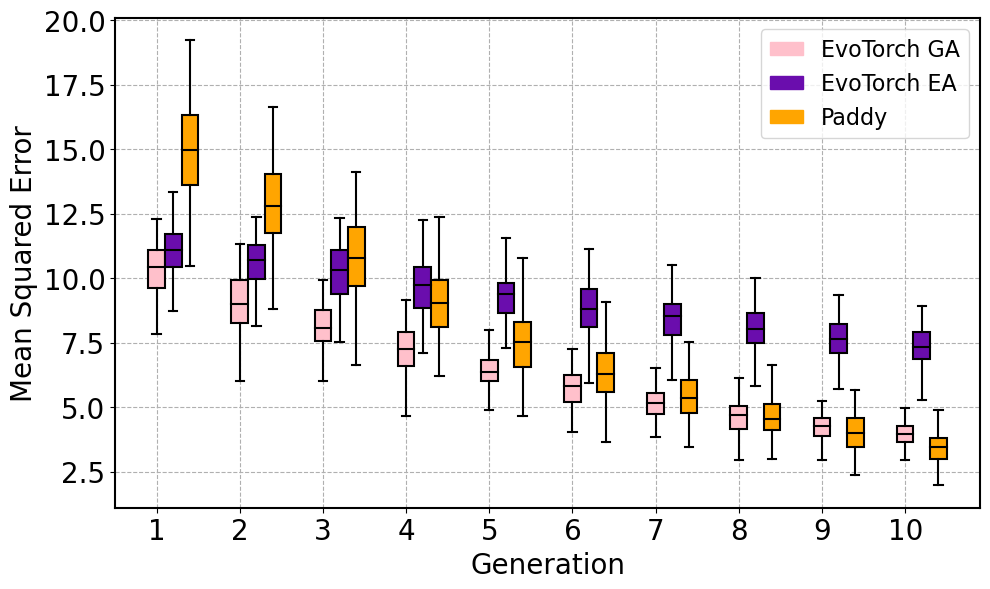

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import Patch for legend
import numpy as np

# Assuming df_GA, df_EA, df_paddy are already defined DataFrames
# Store datasets and their labels in a dictionary
datasets = {"EvoTorch GA": df_GA, "EvoTorch EA": df_EA, "Paddy": df_paddy}

# Define colors for the datasets
dataset_colors = ['#FFC0CB','#6A0DAD',  '#FFA500']  # pink Purple, , orange

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# List to store Patch objects for the legend
legend_patches = []

# Loop through datasets and plot their boxplots
for idx, (label, data) in enumerate(datasets.items()):
    # Extract data per generation
    generations = sorted(data['Generation'].unique())
    data_per_generation = [data[data['Generation'] == gen]['MSE'] for gen in generations]
    
    # Offset the positions of boxplots for each dataset
    positions = np.arange(1, len(generations) + 1) + idx * 0.2
    
    # Plot the boxplot
    bp = ax.boxplot(
        data_per_generation,
        positions=positions,
        patch_artist=True,
        widths=0.2,
        boxprops=dict(linewidth=1.5, color='black'),
        whiskerprops=dict(linewidth=1.5, color='black'),
        capprops=dict(linewidth=1.5, color='black'),
        medianprops=dict(linewidth=1.5, color='black'),
        flierprops=dict(marker=None, color="black", alpha=1),
    )
    
    # Apply color to the boxes
    for box in bp['boxes']:
        box.set(facecolor=dataset_colors[idx % len(dataset_colors)])
    
    # Create a Patch for the legend
    patch = mpatches.Patch(color=dataset_colors[idx % len(dataset_colors)], label=label)
    legend_patches.append(patch)

# Customize spines: set linewidth to 2 and color to black
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# Add labels with increased font size
ax.set_xlabel("Generation", fontsize=20)
ax.set_ylabel("Mean Squared Error", fontsize=20)

# Assume we have 10 generations:
ax.set_xticks(range(1, 11))
ax.set_xticklabels([f"{i}" for i in range(1, 11)], fontsize=20)

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Add the legend with Patch objects and updated font size
ax.legend(
    handles=legend_patches,
    fontsize=16, 
    loc='upper right',
    handleheight=0.5,
    handlelength=1.5
)

# Add grid lines on both axes
ax.grid(axis='both', linestyle='--', alpha=1)

# Adjust layout and show the plot
plt.tight_layout()
# Save figure
plt.savefig('Gramacy_MSE_Generations_PaddyEvotorch_11Jan25.png', dpi=300, bbox_inches='tight')
plt.show()
